In [1]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import polars

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')

nlp=spacy.load("en_core_web_sm")
en = spacy.load("en_core_web_sm")                          
Stop_words=en.Defaults.stop_words
en.max_length=17000000 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
df_r=polars.read_ndjson("/content/drive/MyDrive/Final_Project/Video_Games.json").to_pandas()
df_r

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000,None
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000,None
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200,15
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200,11
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400,None
...,...,...,...,...,...,...,...,...,...,...
2565344,5.0,True,"08 1, 2018",ANGB54K3888S4,B01HJEBIAA,josh,"Love it, work good",Works good,1533081600,None
2565345,5.0,True,"07 17, 2018",A3TEVKR0ZVQB2T,B01HJEBIAA,Prime Member,I do a lot of copy/paste and other keyboard sh...,Great mouse for work and gaming,1531785600,None
2565346,5.0,True,"07 6, 2018",ABE7YPWEHNVJZ,B01HJEBIAA,Amazon Customer,One year in and it's still working great! Hig...,Five Stars,1530835200,None
2565347,5.0,True,"06 12, 2018",A3ES9QBK3G192O,B01HJEBIAA,Lina Marmolejos,EXCELENTE,Five Stars,1528761600,None


In [7]:
df_r.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName          253
reviewText           1715
summary               811
unixReviewTime          0
vote              2122633
dtype: int64

In [8]:
df_r.drop('vote',axis='columns',inplace=True)

In [9]:
df_r.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime
0,1.0,True,"06 9, 2014",A21ROB4YDOZA5P,0439381673,Mary M. Clark,I used to play this game years ago and loved i...,Did not like this,1402272000
1,3.0,True,"05 10, 2014",A3TNZ2Q5E7HTHD,0439381673,Sarabatya,The game itself worked great but the story lin...,Almost Perfect,1399680000
2,4.0,True,"02 7, 2014",A1OKRM3QFEATQO,0439381673,Amazon Customer,I had to learn the hard way after ordering thi...,DOES NOT WORK WITH MAC OS unless it is 10.3 or...,1391731200
3,1.0,True,"02 7, 2014",A2XO1JFCNEYV3T,0439381673,ColoradoPartyof5,The product description should state this clea...,does not work on Mac OSX,1391731200
4,4.0,True,"01 16, 2014",A19WLPIRHD15TH,0439381673,Karen Robinson,I would recommend this learning game for anyon...,Roughing it,1389830400


In [10]:
def cleaning(text):
    text = re.sub("[^0-9A-Za-z- ]+", " ", text)  # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("(?<!\w)\d+", "", text)  # Remove all numbers except those attached to a word
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)  # Remove all hyphens except between two words
    text = " ".join(text.split()) # Remove multiple spaces and lowercase everything
    text = text.lower() #convert all words to lower case
    return text

In [11]:
col_r=['reviewerID','asin','reviewerName','reviewText','summary','unixReviewTime','verified']
for n in col_r:
  df_r[n]=df_r[n].apply(str)
  df_r[n]=df_r[n].apply(cleaning)

Thinking whether i should re wrir=te the review time in correct data format form

In [12]:
df_meta=polars.read_ndjson("/content/drive/MyDrive/Final_Project/meta_Video_Games.json").to_pandas() 
df_meta

,category,tech1,fit,title,tech2,brand,rank,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,description,also_buy,also_view,feature
0,"[Video Games, PC, Games]",,,Reversi Sensory Challenger,,Fidelity Electronics,"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[],[],[],[]
1,"[Video Games, Xbox 360, Games, </span></span><...",,,Medal of Honor: Warfighter - Includes Battlefi...,,by\n \n EA Games,"[>#67,231 in Video Games (See Top 100 in Video...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",[]
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,,street fighter 2 II turbo super nintendo snes ...,,Nintendo,"[>#134,433 in Video Games (See Top 100 in Vide...",Video Games,,,$0.72,0276425316,[],[],[],[],[],[]
3,"[Video Games, Xbox 360, Accessories, Controlle...",,,Xbox 360 MAS STICK,,by\n \n MAS SYSTEMS,"[>#105,263 in Video Games (See Top 100 in Vide...",Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,[],[],[Original PCB used from Xbox 360 Control Pad (...
4,"[Video Games, PC, Games, </span></span></span>...",,,Phonics Alive! 3: The Speller,,by\n \n Advanced Software Pty. Ltd.,"[>#92,397 in Video Games (See Top 100 in Video...",Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[Phonics Alive! 3, The Speller teaches student...",[],[B000BCZ7U0],"[Grades 2-12, Spelling Program, Teaches Spelli..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84814,"[Video Games, PlayStation Vita, Digital Games ...",,,Lego Star Wars: The Force Awakens - PS Vita [D...,,by\n \n Warner Bros.,"[>#74,224 in Video Games (See Top 100 in Video...",Video Games,,,,B01HJ1521Y,[],[],[<div>The Force is strong with this one The No...,[],[],[]
84815,"[Video Games, PlayStation 4, Digital Games & D...",,,Lego Star Wars: The Force Awakens Season Pass...,,by\n \n Warner Bros.,"[>#62,150 in Video Games (See Top 100 in Video...",Video Games,,,\n\t\t ...,B01HJ14TTA,[],[],[<div>The Season Pass includes three Level Pac...,[],[],[DLC Requires base game]
84816,"[Video Games, PlayStation 4, Digital Games & D...",,,The Technomancer - PS4 [Digital Code],,by\n \n Focus Home Interactive,"[>#94,234 in Video Games (See Top 100 in Video...",Video Games,,,,B01HJ14OT0,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"[<div>The Technomancer takes you to Mars, wher...",[],[],[]
84817,"[Video Games, Xbox 360, Accessories, </span></...",,,"Repair T8 T6 Tools for XBOX One Xbox 360, YTTL...",,by\n \n YTTL,"[>#16,087 in Video Games (See Top 100 in Video...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",B01HJC33WS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,[<b>FUNCTIONS:</b><br> 1.Take apart your Xbox ...,"[B01KBNB7K2, B06X6JSYPC, B01N6Y0Z7W, B06VXD2W5...","[B01KH25ZY6, B00PG8SU26, B07G122BVS, B016XLTQP...",[If you want to Replacement you Xbox one /360 ...


In [13]:
df_meta.isnull().sum()

category             0
tech1                0
fit                  0
title                0
tech2                0
brand                0
rank               532
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
description          0
also_buy             0
also_view            0
feature              0
dtype: int64

In [14]:
df_meta.drop(['tech1','tech2','category','fit','similar_item','imageURL','imageURLHighRes','description','rank','also_buy','also_view','date'],axis='columns',inplace=True)


In [15]:
df_meta.isnull().sum()

title       0
brand       0
main_cat    0
price       0
asin        0
feature     0
dtype: int64

In [16]:
col=['title','brand','main_cat','price','asin','feature']
for i in col:
  df_meta[i]=df_meta[i].apply(str)
  df_meta[i]=df_meta[i].apply(cleaning)

In [17]:
"""mvg1['title']=mvg1['title'].apply(cleaning)
mvg1['brand']=mvg1['brand'].apply(cleaning)
mvg1['main_cat']=mvg1['main_cat'].apply(cleaning)"""

"mvg1['title']=mvg1['title'].apply(cleaning)\nmvg1['brand']=mvg1['brand'].apply(cleaning)\nmvg1['main_cat']=mvg1['main_cat'].apply(cleaning)"

In [18]:
df_meta.head()

,title,brand,main_cat,price,asin,feature
0,reversi sensory challenger,fidelity electronics,toys amp games,,,
1,medal of honor warfighter includes battlefield...,by ea games,video games,span class verticalalign a-size-large,,
2,street fighter ii turbo super nintendo snes su...,nintendo,video games,,,
3,xbox mas stick,by mas systems,video games,,,original pcb used from xbox control pad to ens...
4,phonics alive the speller,by advanced software pty ltd,video games,,,grades spelling program teaches spelling rules...


In [19]:
df=pd.merge(df_r,df_meta,on='asin')  # df is merged file
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,price,feature
0,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,reversi sensory challenger,fidelity electronics,toys amp games,,
1,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,medal of honor warfighter includes battlefield...,by ea games,video games,span class verticalalign a-size-large,
2,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,street fighter ii turbo super nintendo snes su...,nintendo,video games,,
3,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,xbox mas stick,by mas systems,video games,,original pcb used from xbox control pad to ens...
4,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,phonics alive the speller,by advanced software pty ltd,video games,,grades spelling program teaches spelling rules...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399027,5.0,true,"08 2, 2017",a1yc7sw0ltvwe8,b01hj14fda,codey,i just recently got in jojo this year i have w...,if you like jojo you will definitely love this...,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399028,5.0,true,"05 29, 2017",ale105h2a6qa4,b01hj14fda,israel valenzuela,love it,five stars,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399029,5.0,false,"03 9, 2017",a3vctglkl6qq2j,b01hj14fda,richard salazar,if you re a fan of jojo then this game is a mu...,great game for jojo fans,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399030,4.0,false,"12 28, 2016",ar7bppapzqe9l,b01hj14fda,amazon customer,great game for any fan of jojo if you love jjb...,good game for big fans,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,


In [20]:
df.shape

(3399032, 14)

In [21]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,price,feature
0,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,reversi sensory challenger,fidelity electronics,toys amp games,,
1,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,medal of honor warfighter includes battlefield...,by ea games,video games,span class verticalalign a-size-large,
2,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,street fighter ii turbo super nintendo snes su...,nintendo,video games,,
3,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,xbox mas stick,by mas systems,video games,,original pcb used from xbox control pad to ens...
4,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,phonics alive the speller,by advanced software pty ltd,video games,,grades spelling program teaches spelling rules...


In [22]:
#df.tail()

In [23]:
#df.dtypes

In [24]:
#df.columns

In [25]:
#df.describe()

In [26]:
#df.describe(include='object')

In [27]:
#df.info()

In [28]:
df.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
title             0
brand             0
main_cat          0
price             0
feature           0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(3399032, 14)

In [31]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,price,feature
0,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,reversi sensory challenger,fidelity electronics,toys amp games,,
1,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,medal of honor warfighter includes battlefield...,by ea games,video games,span class verticalalign a-size-large,
2,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,street fighter ii turbo super nintendo snes su...,nintendo,video games,,
3,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,xbox mas stick,by mas systems,video games,,original pcb used from xbox control pad to ens...
4,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,i used to play this game years ago and loved i...,did not like this,,phonics alive the speller,by advanced software pty ltd,video games,,grades spelling program teaches spelling rules...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399027,5.0,true,"08 2, 2017",a1yc7sw0ltvwe8,b01hj14fda,codey,i just recently got in jojo this year i have w...,if you like jojo you will definitely love this...,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399028,5.0,true,"05 29, 2017",ale105h2a6qa4,b01hj14fda,israel valenzuela,love it,five stars,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399029,5.0,false,"03 9, 2017",a3vctglkl6qq2j,b01hj14fda,richard salazar,if you re a fan of jojo then this game is a mu...,great game for jojo fans,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,
3399030,4.0,false,"12 28, 2016",ar7bppapzqe9l,b01hj14fda,amazon customer,great game for any fan of jojo if you love jjb...,good game for big fans,,jojo eyes of heaven complete bundle ps4 digita...,by bandai,video games,,


In [32]:
#df[df.duplicated('reviewerID',keep=False)]

In [33]:
df.to_csv("/content/drive/MyDrive/Final_Project/VG_Merged_File.csv")

**EDA**

<Axes: xlabel='overall', ylabel='count'>

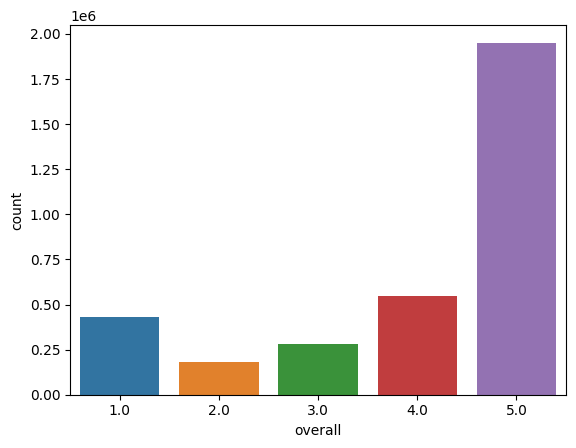

In [34]:
sns.countplot(x = df["overall"])

<BarContainer object of 5 artists>

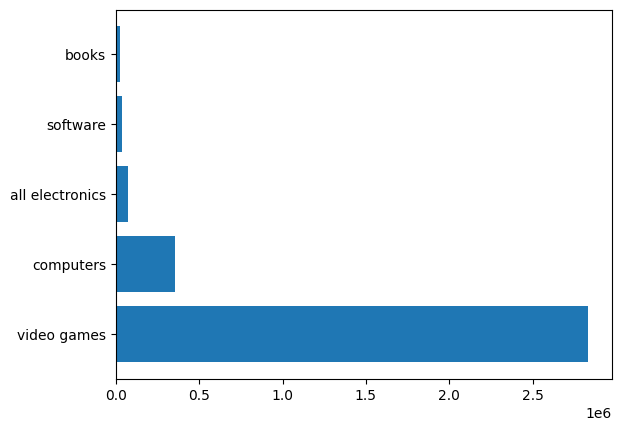

In [35]:
a=df['main_cat'].value_counts().head(5)
a=pd.DataFrame(a)
plt.barh(a.index,a.main_cat)

<BarContainer object of 2 artists>

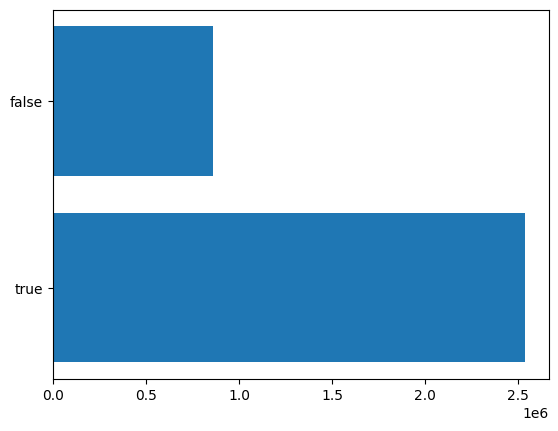

In [36]:
b=df['verified'].value_counts().head(10)
b=pd.DataFrame(b)
plt.barh(b.index,b.verified)

<BarContainer object of 10 artists>

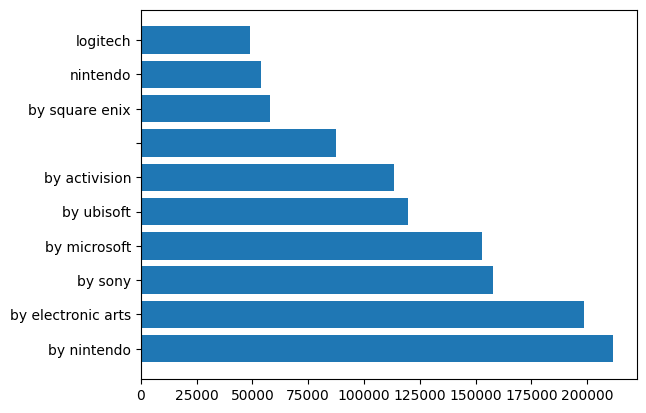

In [37]:
b=df['brand'].value_counts().head(10)
b=pd.DataFrame(b)
plt.barh(b.index,b.brand)

**NLP**

In [38]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
df['reviewText']=df['reviewText'].apply(clean_review)

In [39]:
from textblob import TextBlob
# function to calculate subjectivity
    # function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [40]:
df['Polarity'] = df['reviewText'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,title,brand,main_cat,price,feature,Polarity,Analysis
0,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,used play game years ago loved found work comp...,did not like this,,reversi sensory challenger,fidelity electronics,toys amp games,,,0.15,Positive
1,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,used play game years ago loved found work comp...,did not like this,,medal of honor warfighter includes battlefield...,by ea games,video games,span class verticalalign a-size-large,,0.15,Positive
2,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,used play game years ago loved found work comp...,did not like this,,street fighter ii turbo super nintendo snes su...,nintendo,video games,,,0.15,Positive
3,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,used play game years ago loved found work comp...,did not like this,,xbox mas stick,by mas systems,video games,,original pcb used from xbox control pad to ens...,0.15,Positive
4,1.0,true,"06 9, 2014",a21rob4ydoza5p,,mary m clark,used play game years ago loved found work comp...,did not like this,,phonics alive the speller,by advanced software pty ltd,video games,,grades spelling program teaches spelling rules...,0.15,Positive


In [41]:
df.Analysis.value_counts()

Positive    2481039
Negative     641077
Neutral      276916
Name: Analysis, dtype: int64